## SVM example with real-world data

In this example, we are using a dataset from  from UCI https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Reference:
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
#1) FRESH: annual spending (m.u.) on fresh products (Continuous);
#2) MILK: annual spending (m.u.) on milk products (Continuous);
#3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
#4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
#5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
#6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
#7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
#8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
#Descriptive Statistics:

#(Minimum, Maximum, Mean, Std. Deviation)
#FRESH ( 3, 112151, 12000.30, 12647.329)
#MILK (55, 73498, 5796.27, 7380.377)
#GROCERY (3, 92780, 7951.28, 9503.163)
#FROZEN (25, 60869, 3071.93, 4854.673)
#DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
#DELICATESSEN (3, 47943, 1524.87, 2820.106)

#REGION Frequency
#Lisbon 77
#Oporto 47
#Other Region 316
#Total 440

#CHANNEL Frequency
#Horeca 298
#Retail 142
#Total 440 

df = pd.read_csv('Wholesale_Missing_Data.csv')

# df = df.dropna()  Drop rows which contain missing values
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656.0,7561,214,2674.0,1338
1,2,3,7057,9810.0,9568,1762,3293.0,1776
2,2,3,6353,8808.0,7684,2405,3516.0,7844
3,1,3,13265,1196.0,4221,6404,507.0,1788
4,2,3,22615,5410.0,7198,3915,1777.0,5185


In [3]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.462884,0.608792,-0.202046,0.635567,0.056011
Region,0.062028,1.000000,0.055287,0.031567,0.007696,-0.021044,-0.002404,0.045212
Fresh,-0.169172,0.055287,1.000000,0.098455,-0.011854,0.345881,-0.104830,0.244690
Milk,0.462884,0.031567,0.098455,1.000000,0.728148,0.125374,0.661873,0.405391
Grocery,0.608792,0.007696,-0.011854,0.728148,1.000000,-0.040193,0.924416,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.125374,-0.040193,1.000000,-0.131912,0.390947
Detergents_Paper,0.635567,-0.002404,-0.104830,0.661873,0.924416,-0.131912,1.000000,0.070898
Delicassen,0.056011,0.045212,0.244690,0.405391,0.205497,0.390947,0.070898,1.000000


[Text(0, 0.5, 'Milk'), Text(0.5, 0, 'Detergents_Paper')]

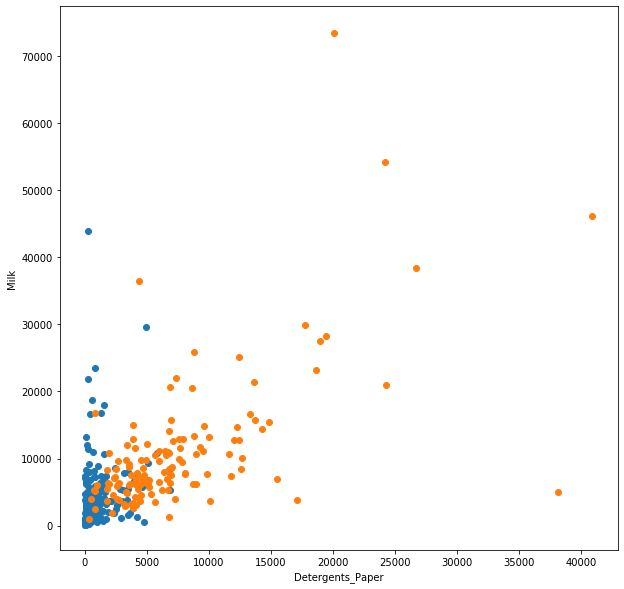

In [4]:
# we can plot the two classes

df_one = df.loc[df['Channel'] == 1]
df_two = df.loc[df['Channel'] == 2]
fix, ax = plt.subplots(figsize=(10,10))
# we are going to use 'Detergents_Paper' and 'Milk' as
ax.scatter(df_one['Detergents_Paper'], df_one['Milk'])
ax.scatter(df_two['Detergents_Paper'], df_two['Milk'])
ax.set(xlabel = 'Detergents_Paper', ylabel = 'Milk')

In [5]:
from sklearn.model_selection import train_test_split

# let afeature 'Milk' and 'Detergents_Paper' be X
#X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
X = df[[ 'Milk', 'Detergents_Paper']]
# let our channel label to be target y
y = df['Channel']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [6]:
X_train.head() # first five rows of training x

,Milk,Detergents_Paper
314,1795.0,857.0
3,1196.0,507.0
18,6327.0,2767.0
393,6730.0,385.0
60,3045.0,4095.0


In [7]:
print(y_test)

265    1
78     1
347    2
255    1
327    1
291    1
184    1
82     2
438    1
405    1
227    1
75     1
218    2
397    1
342    1
76     1
434    1
193    2
73     2
154    1
9      2
176    1
30     1
192    1
104    1
132    1
70     1
220    1
425    1
55     1
      ..
246    1
116    1
427    1
57     2
137    1
24     2
17     1
66     1
266    2
294    1
31     1
84     2
301    2
400    1
94     2
408    2
431    1
153    1
395    1
168    1
296    1
5      2
45     2
421    2
430    1
378    1
417    1
16     2
406    1
117    1
Name: Channel, Length: 110, dtype: int64


In [8]:
# import our model and train it
from sklearn.svm import SVC

# we are going use linear kernel for this model,
# random_state set to the same number 42
svMachine = SVC(kernel = 'linear', gamma = 'auto', class_weight = 'balanced', random_state = 42)
svMachine.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# let the model predicts  and show the results
y_pred = svMachine.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred) # our accuracy score 